# Wine Dataset Analysis - CRISP-DM Methodology

Notebook ini menganalisis dataset Wine menggunakan metodologi **CRISP-DM** (Cross-Industry Standard Process for Data Mining).

## Tahapan CRISP-DM:
1. **Business Understanding** - Memahami tujuan proyek/analisis
2. **Data Understanding** - Eksplorasi dan pemahaman data (EDA)
3. **Data Preprocessing** - Persiapan dan pembersihan data
4. **Modeling** - Pembuatan model machine learning
5. **Evaluation** - Evaluasi performa model
6. **Deployment** - Implementasi model (Streamlit)

---
# 1. Business Understanding

## 1.1 Latar Belakang
**Food spectrographs** digunakan dalam **chemometrics** untuk mengklasifikasikan jenis makanan. Teknik ini memiliki aplikasi penting dalam:
- **Food Safety** (Keamanan Pangan)
- **Quality Assurance** (Jaminan Kualitas)

## 1.2 Tujuan Proyek
Membangun model klasifikasi untuk membedakan:
- **Strawberry asli (authentic samples)**
- **Bukan strawberry (adulterated strawberries dan buah lainnya)**

## 1.3 Metode Pengumpulan Data
Data dikumpulkan menggunakan:
- **Fourier Transform Infrared (FTIR) Spectroscopy**
- **Attenuated Total Reflectance (ATR) Sampling**

## 1.4 Manfaat
- Deteksi pemalsuan produk makanan
- Kontrol kualitas produk pangan
- Otomatisasi proses inspeksi makanan

---
# 2. Data Understanding

Pada tahap ini kita akan melakukan eksplorasi data (EDA) secara menyeluruh.

## 2.1 Import Library

In [1]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Pengaturan visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Library berhasil diimport!")

Library berhasil diimport!


## 2.2 Load Dataset

In [2]:
# Load data training dan testing
# Dataset menggunakan format space-separated values

train_data = np.loadtxt('Wine_TRAIN.txt')
test_data = np.loadtxt('Wine_TEST.txt')

print(f"Data berhasil dimuat!")
print(f"Shape data training: {train_data.shape}")
print(f"Shape data testing: {test_data.shape}")

FileNotFoundError: Wine_TRAIN.txt not found.

In [3]:
# Pisahkan label (kolom pertama) dan fitur (kolom sisanya)
X_train = train_data[:, 1:]  # Fitur spektral
y_train = train_data[:, 0]   # Label kelas

X_test = test_data[:, 1:]
y_test = test_data[:, 0]

print("Dimensi Data:")
print(f"   X_train: {X_train.shape} - {X_train.shape[0]} sampel, {X_train.shape[1]} fitur")
print(f"   y_train: {y_train.shape} - {len(y_train)} label")
print(f"   X_test:  {X_test.shape} - {X_test.shape[0]} sampel, {X_test.shape[1]} fitur")
print(f"   y_test:  {y_test.shape} - {len(y_test)} label")

Dimensi Data:
   X_train: (57, 234) - 57 sampel, 234 fitur
   y_train: (57,) - 57 label
   X_test:  (54, 234) - 54 sampel, 234 fitur
   y_test:  (54,) - 54 label


## 2.3 Deskripsi Dataset

### 2.3.1 Asal dan Sumber Dataset

Dataset **Wine** ini merupakan bagian dari **UCR Time Series Classification Archive**, yang merupakan salah satu repositori dataset time-series paling populer untuk penelitian machine learning dan data mining.

| Informasi | Detail |
|-----------|--------|
| **Nama Dataset** | Wine |
| **Sumber** | UCR Time Series Classification Archive |
| **Domain** | Chemometrics / Food Science |
| **Tahun Publikasi** | Tersedia sejak 2015 di UCR Archive |
| **Referensi** | Holland et al. (1998), Analytical Methods |

### 2.3.2 Metode Pengumpulan Data

Data dikumpulkan menggunakan teknologi **Fourier Transform Infrared (FTIR) Spectroscopy** dengan teknik **Attenuated Total Reflectance (ATR)**:

**Apa itu FTIR Spectroscopy?**
- FTIR adalah teknik analisis yang mengukur **absorpsi cahaya inframerah** oleh molekul dalam sampel
- Setiap molekul memiliki **pola absorpsi unik** (fingerprint) pada berbagai panjang gelombang
- Teknik ini dapat mengidentifikasi komposisi kimia sampel tanpa merusaknya (non-destructive)

**Apa itu ATR Sampling?**
- ATR adalah teknik sampling di mana sampel ditempatkan langsung pada kristal optik
- Cahaya inframerah dipantulkan melalui kristal dan berinteraksi dengan sampel
- Metode ini cocok untuk sampel padat, cair, dan semi-padat seperti buah

### 2.3.3 Struktur dan Format Dataset

| Komponen | Detail |
|----------|--------|
| **Format File** | Text file (.txt) dengan space-separated values |
| **Jumlah File** | 2 file (Wine_TRAIN.txt dan Wine_TEST.txt) |
| **Total Kolom** | 235 kolom per baris |
| **Kolom 1** | Label/Kelas target |
| **Kolom 2-235** | 234 Fitur Spektral |
| **Tipe Nilai** | Floating point (scientific notation) |

### 2.3.4 Penjelasan Kelas Target

| Kelas | Nilai | Deskripsi |
|-------|-------|-----------|
| **Kelas 1** | 1.0 | **Strawberry Asli (Authentic)** - Sampel strawberry murni tanpa pemalsuan |
| **Kelas 2** | 2.0 | **Bukan Strawberry (Adulterated/Other)** - Strawberry yang dipalsukan atau buah lainnya |

### 2.3.5 Penjelasan Fitur Spektral (234 Fitur)

Setiap fitur merepresentasikan **intensitas absorbansi pada titik panjang gelombang tertentu** dalam spektrum inframerah:

| Aspek | Penjelasan |
|-------|------------|
| **Jumlah Fitur** | 234 fitur (Spectral_1 sampai Spectral_234) |
| **Representasi** | Setiap fitur = titik sampling pada kurva spektral |
| **Rentang Nilai** | Negatif hingga positif (setelah preprocessing baseline correction) |
| **Satuan** | Arbitrary Units (AU) - nilai absorbansi relatif |
| **Urutan** | Fitur berurutan sesuai panjang gelombang (wavelength) |

**Mengapa Ada 234 Fitur?**
- Spektroskopi FTIR menghasilkan **kurva spektral kontinu** yang di-diskritisasi menjadi titik-titik sampling
- Semakin banyak titik sampling, semakin detail informasi yang ditangkap
- 234 titik memberikan resolusi yang cukup untuk membedakan pola spektral berbagai sampel
- Fitur yang berdekatan biasanya memiliki **korelasi tinggi** karena kontinuitas spektrum

### 2.3.6 Karakteristik Data Spektral

| Karakteristik | Deskripsi |
|---------------|-----------|
| **Time-series like** | Data berurutan seperti time-series, tapi berdasarkan panjang gelombang |
| **High-dimensional** | 234 dimensi fitur untuk setiap sampel |
| **Correlated features** | Fitur bersebelahan cenderung berkorelasi tinggi |
| **Normalized** | Data sudah dinormalisasi/preprocessing dari sumber asli |
| **No missing values** | Dataset lengkap tanpa nilai yang hilang |

In [4]:
# Buat DataFrame untuk analisis lebih mudah
feature_names = [f'Spectral_{i}' for i in range(1, X_train.shape[1] + 1)]

df_train = pd.DataFrame(X_train, columns=feature_names)
df_train['Label'] = y_train

df_test = pd.DataFrame(X_test, columns=feature_names)
df_test['Label'] = y_test

print("Informasi Dataset Training:")
print(f"   Jumlah sampel: {len(df_train)}")
print(f"   Jumlah fitur: {len(feature_names)}")
print(f"   Jumlah kolom total: {len(df_train.columns)}")
print(f"\nPreview Data (5 baris pertama):")
df_train.head()

Informasi Dataset Training:
   Jumlah sampel: 57
   Jumlah fitur: 234
   Jumlah kolom total: 235

Preview Data (5 baris pertama):


,Spectral_1,Spectral_2,Spectral_3,Spectral_4,Spectral_5,Spectral_6,Spectral_7,Spectral_8,Spectral_9,Spectral_10,...,Spectral_226,Spectral_227,Spectral_228,Spectral_229,Spectral_230,Spectral_231,Spectral_232,Spectral_233,Spectral_234,Label
0,1.781622,1.641665,1.513937,1.394362,1.282035,1.174689,1.070514,0.970415,0.873940,0.780636,...,-1.709601,-1.744930,-1.782977,-1.810606,-1.837329,-1.860882,-1.880358,-1.901193,-1.918857,1.0
1,1.779750,1.638856,1.512006,1.391952,1.277787,1.170418,1.066673,0.967005,0.871415,0.778995,...,-1.710431,-1.745768,-1.783370,-1.811005,-1.837734,-1.861292,-1.880773,-1.901612,-1.919280,1.0
2,1.776492,1.636260,1.508282,1.388472,1.275469,1.166551,1.063533,0.965053,0.868388,0.775354,...,-1.713876,-1.748820,-1.786488,-1.814171,-1.840947,-1.864546,-1.884060,-1.904482,-1.922635,1.0
3,1.774080,1.635140,1.507890,1.388734,1.277222,1.171555,1.066788,0.966517,0.872091,0.780813,...,-1.695384,-1.730906,-1.769126,-1.796555,-1.823084,-1.846465,-1.865800,-1.886933,-1.904919,1.0
4,1.776502,1.637654,1.510938,1.392310,1.279075,1.172580,1.069230,0.970373,0.874662,0.782546,...,-1.694706,-1.730204,-1.768399,-1.795809,-1.821871,-1.844788,-1.864559,-1.885678,-1.903652,1.0


In [5]:
# Informasi tipe data
print("Informasi Tipe Data:")
print(df_train.dtypes.value_counts())
print(f"\nMemory usage: {df_train.memory_usage(deep=True).sum() / 1024:.2f} KB")

Informasi Tipe Data:
float64    235
Name: count, dtype: int64

Memory usage: 104.77 KB


## 2.4 Statistik Deskriptif

In [6]:
# Statistik deskriptif untuk beberapa fitur
print("Statistik Deskriptif (10 fitur pertama + Label):")
selected_cols = feature_names[:10] + ['Label']
df_train[selected_cols].describe().round(4)

Statistik Deskriptif (10 fitur pertama + Label):


,Spectral_1,Spectral_2,Spectral_3,Spectral_4,Spectral_5,Spectral_6,Spectral_7,Spectral_8,Spectral_9,Spectral_10,Label
count,57.0000,57.0000,57.0000,57.0000,57.0000,57.0000,57.0000,57.0000,57.0000,57.0000,57.0000
mean,1.7021,1.5661,1.4432,1.3293,1.2226,1.1205,1.0220,0.9272,0.8353,0.7465,1.4737
std,0.0368,0.0349,0.0328,0.0304,0.0278,0.0253,0.0231,0.0212,0.0194,0.0179,0.5037
min,1.6565,1.5238,1.4031,1.2931,1.1888,1.0891,0.9920,0.8981,0.8077,0.7200,1.0000
25%,1.6782,1.5449,1.4222,1.3111,1.2042,1.1035,1.0064,0.9121,0.8213,0.7335,1.0000
50%,1.6882,1.5533,1.4314,1.3177,1.2126,1.1118,1.0143,0.9199,0.8290,0.7432,1.0000
75%,1.7153,1.5787,1.4556,1.3401,1.2330,1.1310,1.0316,0.9368,0.8451,0.7551,2.0000
max,1.7816,1.6417,1.5139,1.3944,1.2820,1.1747,1.0708,0.9717,0.8753,0.7825,2.0000


In [7]:
# Statistik keseluruhan fitur
print("Ringkasan Statistik Seluruh Fitur Spektral:")
print(f"   Nilai Minimum: {X_train.min():.4f}")
print(f"   Nilai Maksimum: {X_train.max():.4f}")
print(f"   Nilai Rata-rata: {X_train.mean():.4f}")
print(f"   Standar Deviasi: {X_train.std():.4f}")
print(f"   Median: {np.median(X_train):.4f}")
print(f"   Skewness (rata-rata): {pd.DataFrame(X_train).skew().mean():.4f}")
print(f"   Kurtosis (rata-rata): {pd.DataFrame(X_train).kurtosis().mean():.4f}")

Ringkasan Statistik Seluruh Fitur Spektral:
   Nilai Minimum: -1.9425
   Nilai Maksimum: 3.2006
   Nilai Rata-rata: 0.0000
   Standar Deviasi: 0.9979
   Median: -0.3367
   Skewness (rata-rata): 0.0123
   Kurtosis (rata-rata): 1.1491


## 2.5 Distribusi Kelas (Label)

In [8]:
# Distribusi kelas pada data training
class_counts_train = pd.Series(y_train).value_counts().sort_index()
class_counts_test = pd.Series(y_test).value_counts().sort_index()

print("Distribusi Kelas:")
print("\nData Training:")
for label, count in class_counts_train.items():
    label_name = "Strawberry (Asli)" if label == 1.0 else "Bukan Strawberry (Palsu/Lainnya)"
    percentage = (count / len(y_train)) * 100
    print(f"   Kelas {int(label)} ({label_name}): {count} sampel ({percentage:.1f}%)")

print(f"\nData Testing:")
for label, count in class_counts_test.items():
    label_name = "Strawberry (Asli)" if label == 1.0 else "Bukan Strawberry (Palsu/Lainnya)"
    percentage = (count / len(y_test)) * 100
    print(f"   Kelas {int(label)} ({label_name}): {count} sampel ({percentage:.1f}%)")

# Cek balance
ratio = class_counts_train.min() / class_counts_train.max()
print(f"\nRasio Kelas (min/max): {ratio:.2f}")
if ratio > 0.8:
    print("Status: Dataset BALANCED")
elif ratio > 0.5:
    print("Status: Dataset SLIGHTLY IMBALANCED")
else:
    print("Status: Dataset IMBALANCED")

Distribusi Kelas:

Data Training:
   Kelas 1 (Strawberry (Asli)): 30 sampel (52.6%)
   Kelas 2 (Bukan Strawberry (Palsu/Lainnya)): 27 sampel (47.4%)

Data Testing:
   Kelas 1 (Strawberry (Asli)): 27 sampel (50.0%)
   Kelas 2 (Bukan Strawberry (Palsu/Lainnya)): 27 sampel (50.0%)

Rasio Kelas (min/max): 0.90
Status: Dataset BALANCED


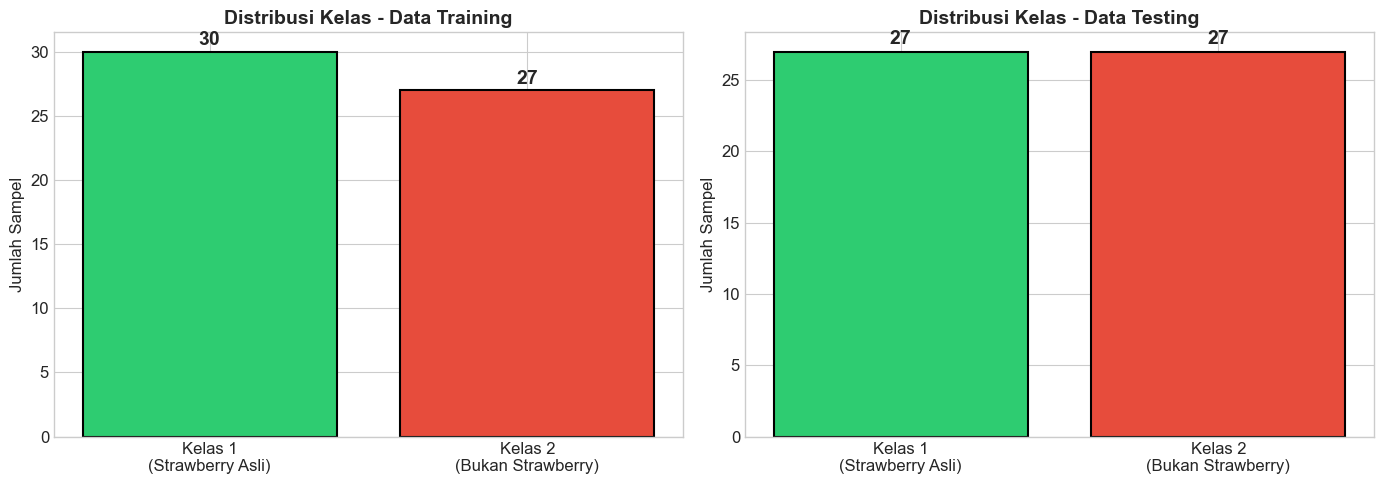

In [9]:
# Visualisasi distribusi kelas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Data Training
colors = ['#2ecc71', '#e74c3c']
labels = ['Kelas 1\n(Strawberry Asli)', 'Kelas 2\n(Bukan Strawberry)']

axes[0].bar(labels, class_counts_train.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_title('Distribusi Kelas - Data Training', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Jumlah Sampel', fontsize=12)
for i, v in enumerate(class_counts_train.values):
    axes[0].text(i, v + 0.5, str(v), ha='center', fontsize=14, fontweight='bold')

# Data Testing
axes[1].bar(labels, class_counts_test.values, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_title('Distribusi Kelas - Data Testing', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Jumlah Sampel', fontsize=12)
for i, v in enumerate(class_counts_test.values):
    axes[1].text(i, v + 0.5, str(v), ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 2.6 Visualisasi Spektrum

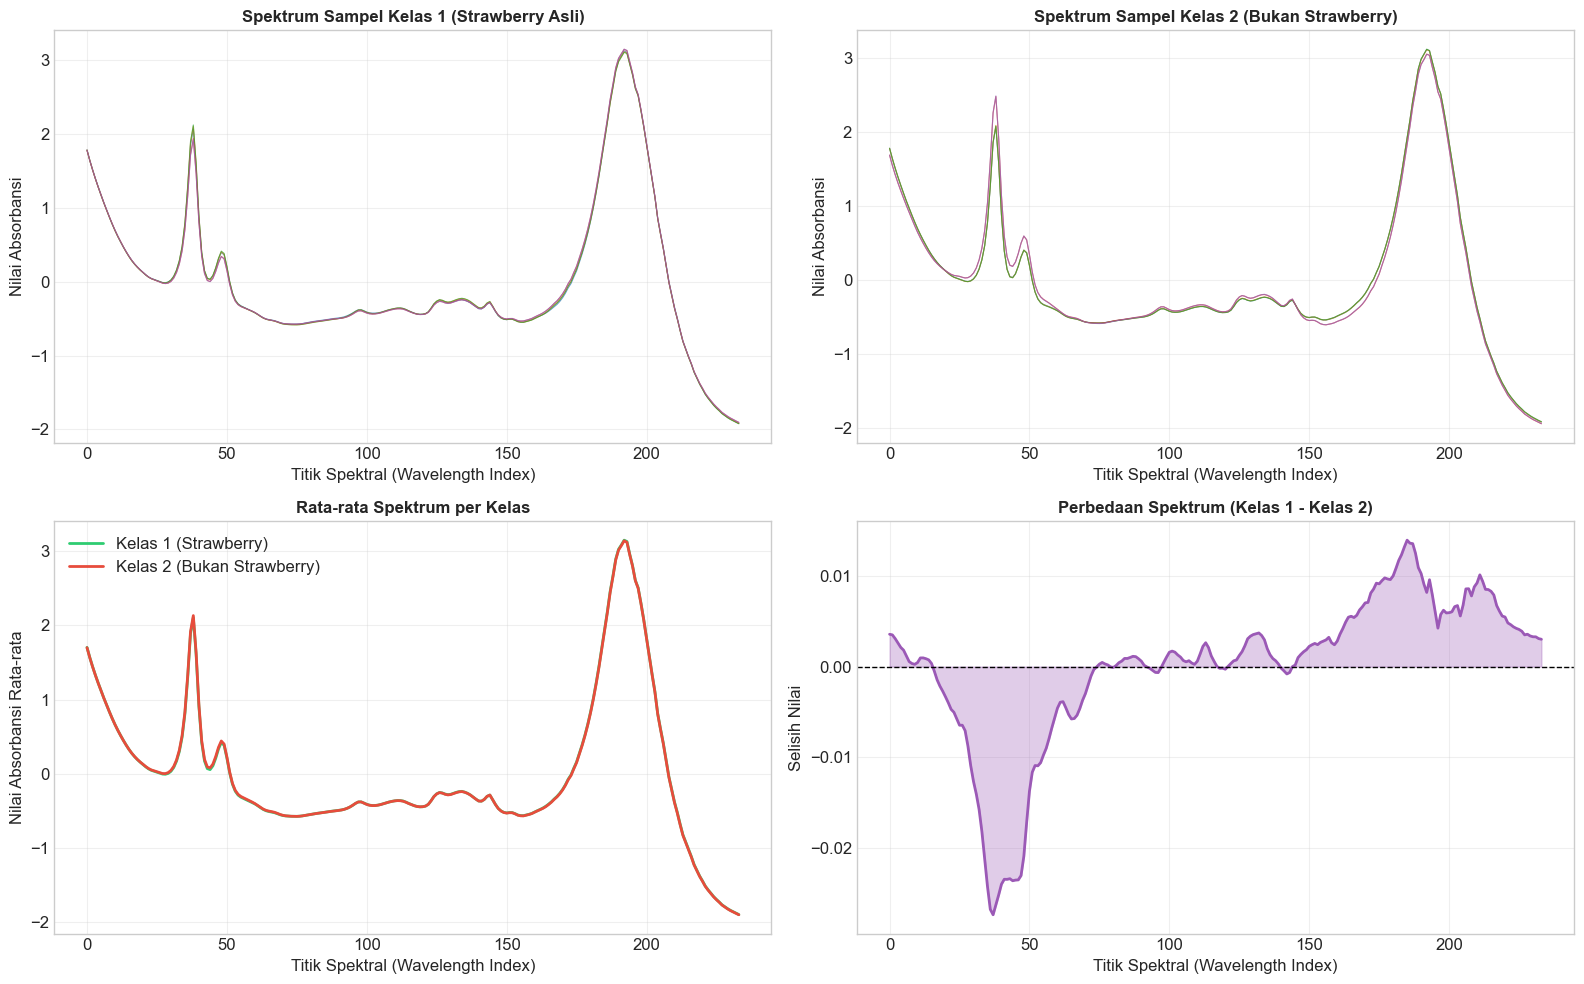

In [10]:
# Visualisasi spektrum beberapa sampel
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Sampel dari Kelas 1 (Strawberry Asli)
class1_indices = np.where(y_train == 1.0)[0]
class2_indices = np.where(y_train == 2.0)[0]

# Plot beberapa sampel kelas 1
ax1 = axes[0, 0]
for i in range(min(5, len(class1_indices))):
    ax1.plot(X_train[class1_indices[i]], alpha=0.7, linewidth=0.8)
ax1.set_title('Spektrum Sampel Kelas 1 (Strawberry Asli)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Titik Spektral (Wavelength Index)')
ax1.set_ylabel('Nilai Absorbansi')
ax1.grid(True, alpha=0.3)

# Plot beberapa sampel kelas 2
ax2 = axes[0, 1]
for i in range(min(5, len(class2_indices))):
    ax2.plot(X_train[class2_indices[i]], alpha=0.7, linewidth=0.8)
ax2.set_title('Spektrum Sampel Kelas 2 (Bukan Strawberry)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Titik Spektral (Wavelength Index)')
ax2.set_ylabel('Nilai Absorbansi')
ax2.grid(True, alpha=0.3)

# Rata-rata spektrum per kelas
ax3 = axes[1, 0]
mean_class1 = X_train[class1_indices].mean(axis=0)
mean_class2 = X_train[class2_indices].mean(axis=0)
ax3.plot(mean_class1, label='Kelas 1 (Strawberry)', color='#2ecc71', linewidth=2)
ax3.plot(mean_class2, label='Kelas 2 (Bukan Strawberry)', color='#e74c3c', linewidth=2)
ax3.set_title('Rata-rata Spektrum per Kelas', fontsize=12, fontweight='bold')
ax3.set_xlabel('Titik Spektral (Wavelength Index)')
ax3.set_ylabel('Nilai Absorbansi Rata-rata')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Perbedaan spektrum antar kelas
ax4 = axes[1, 1]
diff_spectrum = mean_class1 - mean_class2
ax4.plot(diff_spectrum, color='#9b59b6', linewidth=2)
ax4.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax4.fill_between(range(len(diff_spectrum)), diff_spectrum, 0, alpha=0.3, color='#9b59b6')
ax4.set_title('Perbedaan Spektrum (Kelas 1 - Kelas 2)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Titik Spektral (Wavelength Index)')
ax4.set_ylabel('Selisih Nilai')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2.7 Analisis Missing Values dan Data Quality

In [11]:
# Cek missing values
missing_train = np.isnan(X_train).sum()
missing_test = np.isnan(X_test).sum()

print("Analisis Missing Values:")
print(f"   Data Training: {missing_train} missing values")
print(f"   Data Testing: {missing_test} missing values")

if missing_train == 0 and missing_test == 0:
    print("\n[OK] Tidak ada missing values dalam dataset!")
else:
    print("\n[WARNING] Terdapat missing values yang perlu ditangani!")

# Cek infinite values
inf_train = np.isinf(X_train).sum()
inf_test = np.isinf(X_test).sum()
print(f"\nAnalisis Infinite Values:")
print(f"   Data Training: {inf_train} infinite values")
print(f"   Data Testing: {inf_test} infinite values")

# Cek duplicate rows
dup_train = pd.DataFrame(X_train).duplicated().sum()
dup_test = pd.DataFrame(X_test).duplicated().sum()
print(f"\nAnalisis Duplicate Rows:")
print(f"   Data Training: {dup_train} duplicate rows")
print(f"   Data Testing: {dup_test} duplicate rows")

Analisis Missing Values:
   Data Training: 0 missing values
   Data Testing: 0 missing values

[OK] Tidak ada missing values dalam dataset!

Analisis Infinite Values:
   Data Training: 0 infinite values
   Data Testing: 0 infinite values

Analisis Duplicate Rows:
   Data Training: 0 duplicate rows
   Data Testing: 0 duplicate rows


## 2.8 Analisis Distribusi Fitur

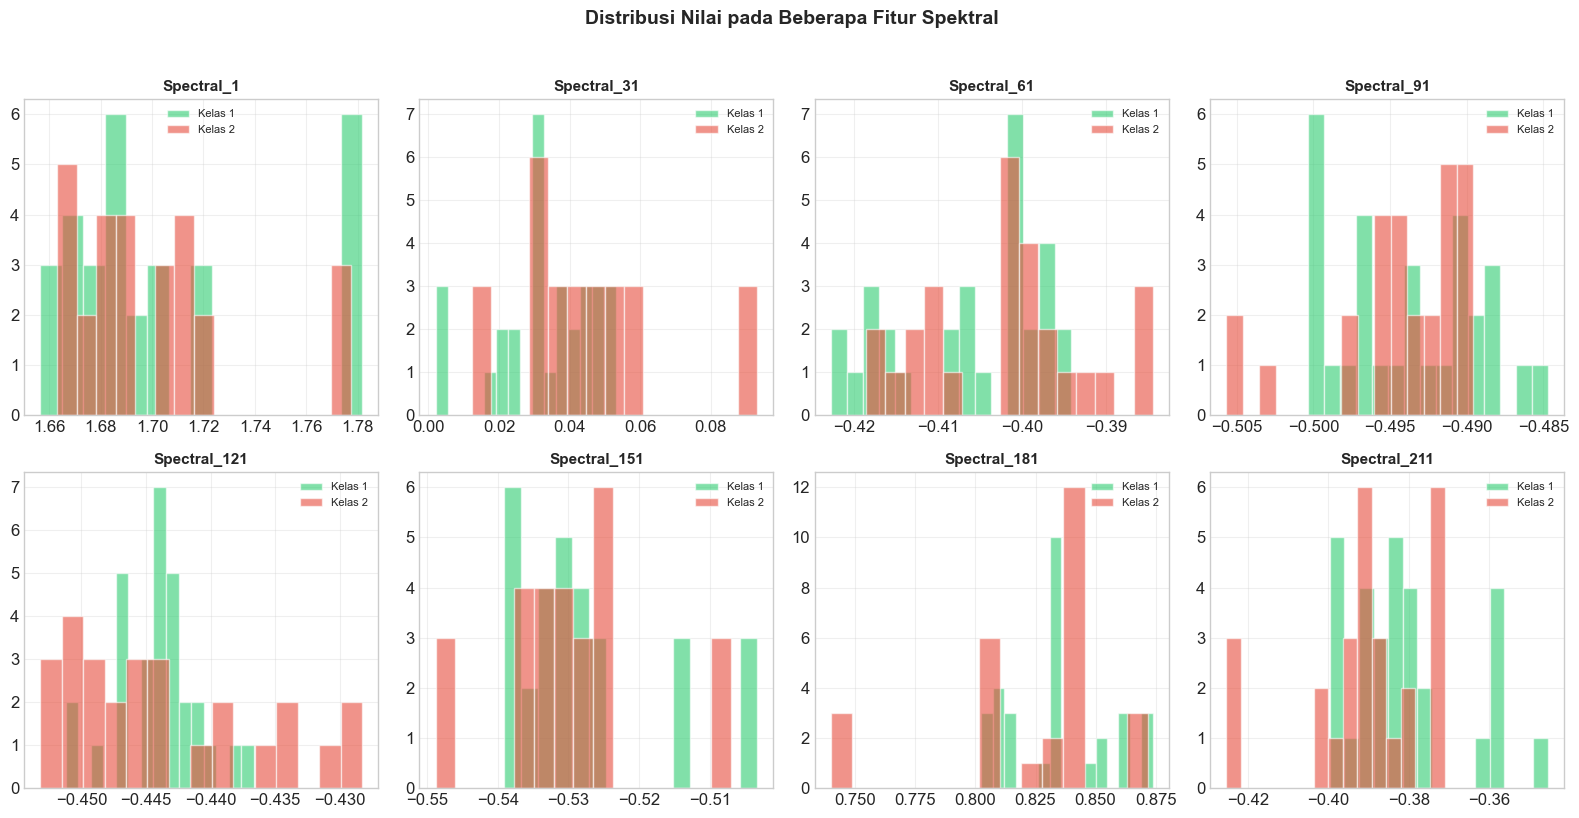

In [12]:
# Distribusi nilai pada beberapa fitur
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Pilih 8 fitur untuk divisualisasikan (awal, tengah, akhir)
selected_features = [0, 30, 60, 90, 120, 150, 180, 210]

for idx, feat_idx in enumerate(selected_features):
    ax = axes[idx]
    
    # Data per kelas
    data_class1 = X_train[class1_indices, feat_idx]
    data_class2 = X_train[class2_indices, feat_idx]
    
    ax.hist(data_class1, bins=15, alpha=0.6, label='Kelas 1', color='#2ecc71', edgecolor='white')
    ax.hist(data_class2, bins=15, alpha=0.6, label='Kelas 2', color='#e74c3c', edgecolor='white')
    ax.set_title(f'Spectral_{feat_idx + 1}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribusi Nilai pada Beberapa Fitur Spektral', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 2.9 Korelasi Antar Fitur

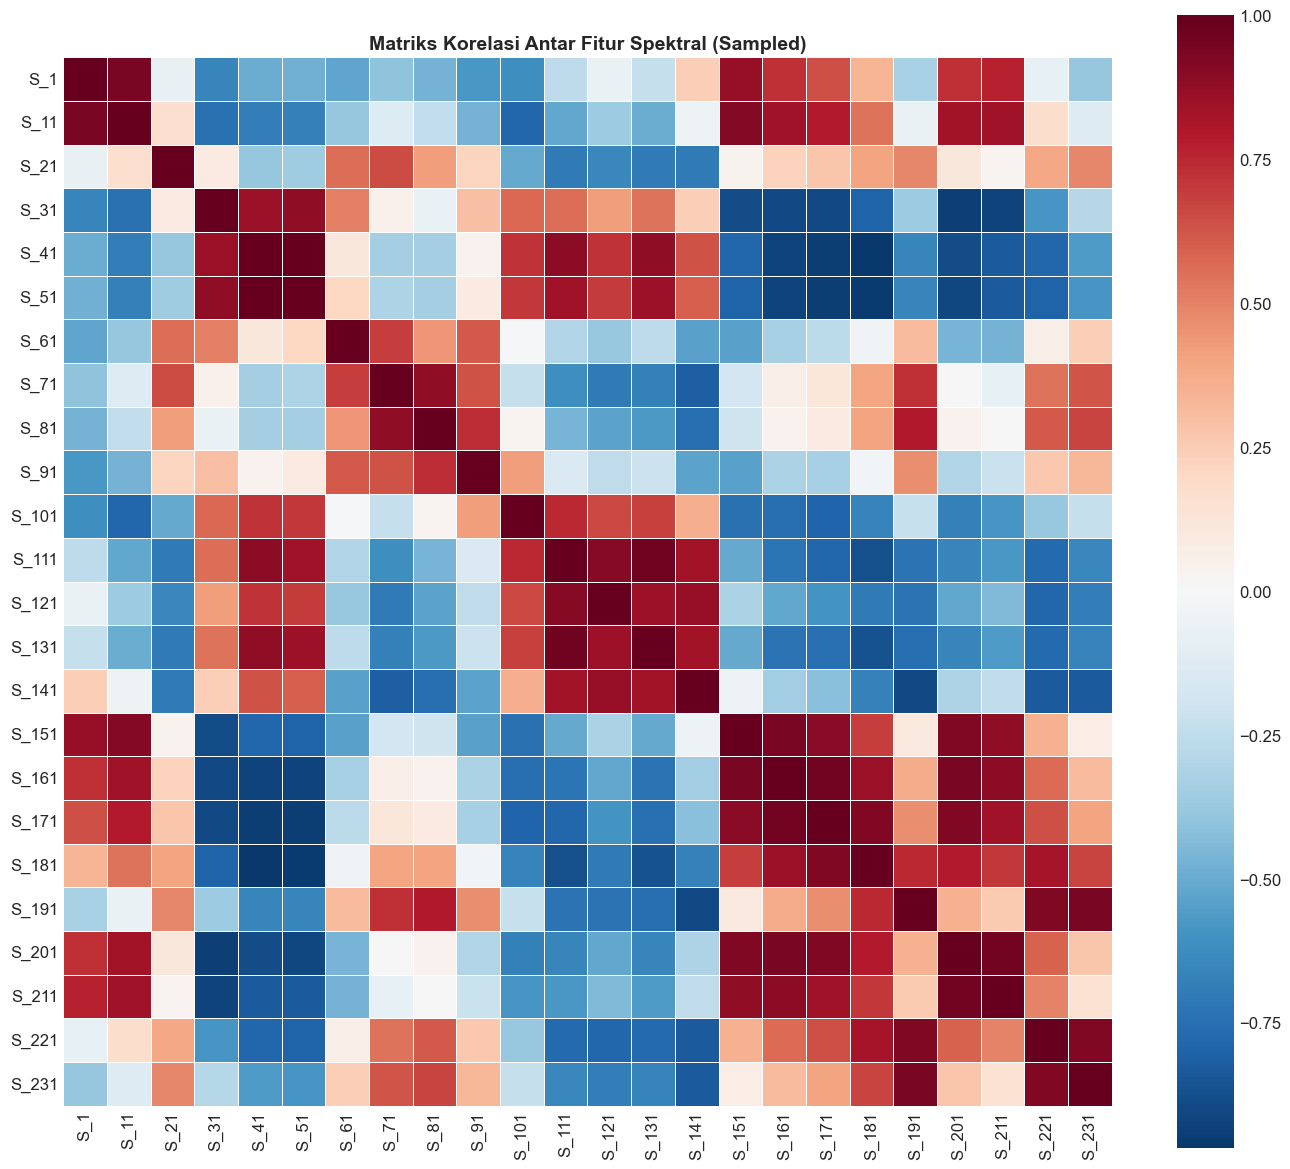

In [13]:
# Matriks korelasi (sample dari fitur karena terlalu banyak)
# Pilih setiap fitur ke-10 untuk visualisasi
sample_indices = list(range(0, X_train.shape[1], 10))
sample_features = [feature_names[i] for i in sample_indices]

corr_matrix = df_train[sample_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5,
            xticklabels=[f'S_{i+1}' for i in sample_indices],
            yticklabels=[f'S_{i+1}' for i in sample_indices])
plt.title('Matriks Korelasi Antar Fitur Spektral (Sampled)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 2.11 Ringkasan Data Understanding

### Temuan Utama:

| Aspek | Temuan |
|-------|--------|
| **Nama Dataset** | Wine (UCR Time Series Archive) |
| **Domain** | Chemometrics / Food Science |
| **Metode Akuisisi** | FTIR Spectroscopy dengan ATR Sampling |
| **Jumlah Fitur** | 234 fitur spektral |
| **Jumlah Kelas** | 2 kelas (Strawberry vs Bukan Strawberry) |
| **Missing Values** | Tidak ada |
| **Tipe Data** | Data kontinyu (spectral/time-series like) |
| **Range Nilai** | Bervariasi (negatif hingga positif) |

### Karakteristik Penting:
1. **Data spektral memiliki korelasi tinggi** antar fitur yang berdekatan (karakteristik data spektral)
2. **Terdapat perbedaan pola spektral** antara kedua kelas yang dapat dieksploitasi untuk klasifikasi
3. **Tidak ada missing values** sehingga tidak perlu imputasi
4. **Distribusi data bervariasi** pada setiap titik spektral
5. **Dataset relatif kecil** sehingga perlu teknik yang tepat untuk menghindari overfitting

In [14]:
# Ringkasan akhir
print("="*70)
print("                    RINGKASAN DATA UNDERSTANDING")
print("="*70)
print(f"\nDataset: Wine (Food Spectrographs - UCR Archive)")
print(f"Metode: FTIR Spectroscopy dengan ATR Sampling")
print(f"\n{'='*70}")
print(f"\nUkuran Dataset:")
print(f"   - Training: {X_train.shape[0]} sampel x {X_train.shape[1]} fitur")
print(f"   - Testing:  {X_test.shape[0]} sampel x {X_test.shape[1]} fitur")
print(f"   - Total:    {X_train.shape[0] + X_test.shape[0]} sampel")
print(f"\nJumlah Kelas: 2")
print(f"   - Kelas 1 (Strawberry Asli): {len(class1_indices)} training, {(y_test == 1.0).sum()} testing")
print(f"   - Kelas 2 (Bukan Strawberry): {len(class2_indices)} training, {(y_test == 2.0).sum()} testing")
print(f"\nStatistik Fitur:")
print(f"   - Minimum: {X_train.min():.4f}")
print(f"   - Maximum: {X_train.max():.4f}")
print(f"   - Mean:    {X_train.mean():.4f}")
print(f"   - Std:     {X_train.std():.4f}")
print(f"\nKualitas Data:")
print(f"   - Missing Values: 0")
print(f"   - Infinite Values: 0")
print(f"   - Duplicate Rows: {dup_train}")
print(f"\n{'='*70}")

                    RINGKASAN DATA UNDERSTANDING

Dataset: Wine (Food Spectrographs - UCR Archive)
Metode: FTIR Spectroscopy dengan ATR Sampling


Ukuran Dataset:
   - Training: 57 sampel x 234 fitur
   - Testing:  54 sampel x 234 fitur
   - Total:    111 sampel

Jumlah Kelas: 2
   - Kelas 1 (Strawberry Asli): 30 training, 27 testing
   - Kelas 2 (Bukan Strawberry): 27 training, 27 testing

Statistik Fitur:
   - Minimum: -1.9425
   - Maximum: 3.2006
   - Mean:    0.0000
   - Std:     0.9979

Kualitas Data:
   - Missing Values: 0
   - Infinite Values: 0
   - Duplicate Rows: 0



---
# 3. Data Preprocessing

Pada tahap ini, kita akan mempersiapkan data untuk proses modeling dengan melakukan:
1. **Standardization/Normalization** - Menyesuaikan skala fitur
2. **Dimensionality Reduction** - Reduksi dimensi menggunakan PCA
3. **Data Validation** - Memastikan data siap untuk modeling

## 3.1 Import Library untuk Preprocessing

In [15]:
# Import library untuk preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold

print("Library preprocessing berhasil diimport!")

Library preprocessing berhasil diimport!


## 3.2 Feature Scaling (Standardization)

Data spektral perlu di-standardisasi agar setiap fitur memiliki mean=0 dan std=1. Ini penting untuk:
- Algoritma yang sensitif terhadap skala (SVM, KNN, Neural Networks)
- Mempercepat konvergensi pada proses training
- Menghindari dominasi fitur dengan nilai besar

In [16]:
# Standardization menggunakan StandardScaler
scaler = StandardScaler()

# Fit pada data training, transform pada kedua dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Hasil Standardization:")
print(f"\nSebelum Scaling (X_train):")
print(f"   Mean: {X_train.mean():.4f}")
print(f"   Std:  {X_train.std():.4f}")
print(f"   Min:  {X_train.min():.4f}")
print(f"   Max:  {X_train.max():.4f}")

print(f"\nSetelah Scaling (X_train_scaled):")
print(f"   Mean: {X_train_scaled.mean():.6f}")
print(f"   Std:  {X_train_scaled.std():.4f}")
print(f"   Min:  {X_train_scaled.min():.4f}")
print(f"   Max:  {X_train_scaled.max():.4f}")

Hasil Standardization:

Sebelum Scaling (X_train):
   Mean: 0.0000
   Std:  0.9979
   Min:  -1.9425
   Max:  3.2006

Setelah Scaling (X_train_scaled):
   Mean: -0.000000
   Std:  1.0000
   Min:  -3.7000
   Max:  3.2496


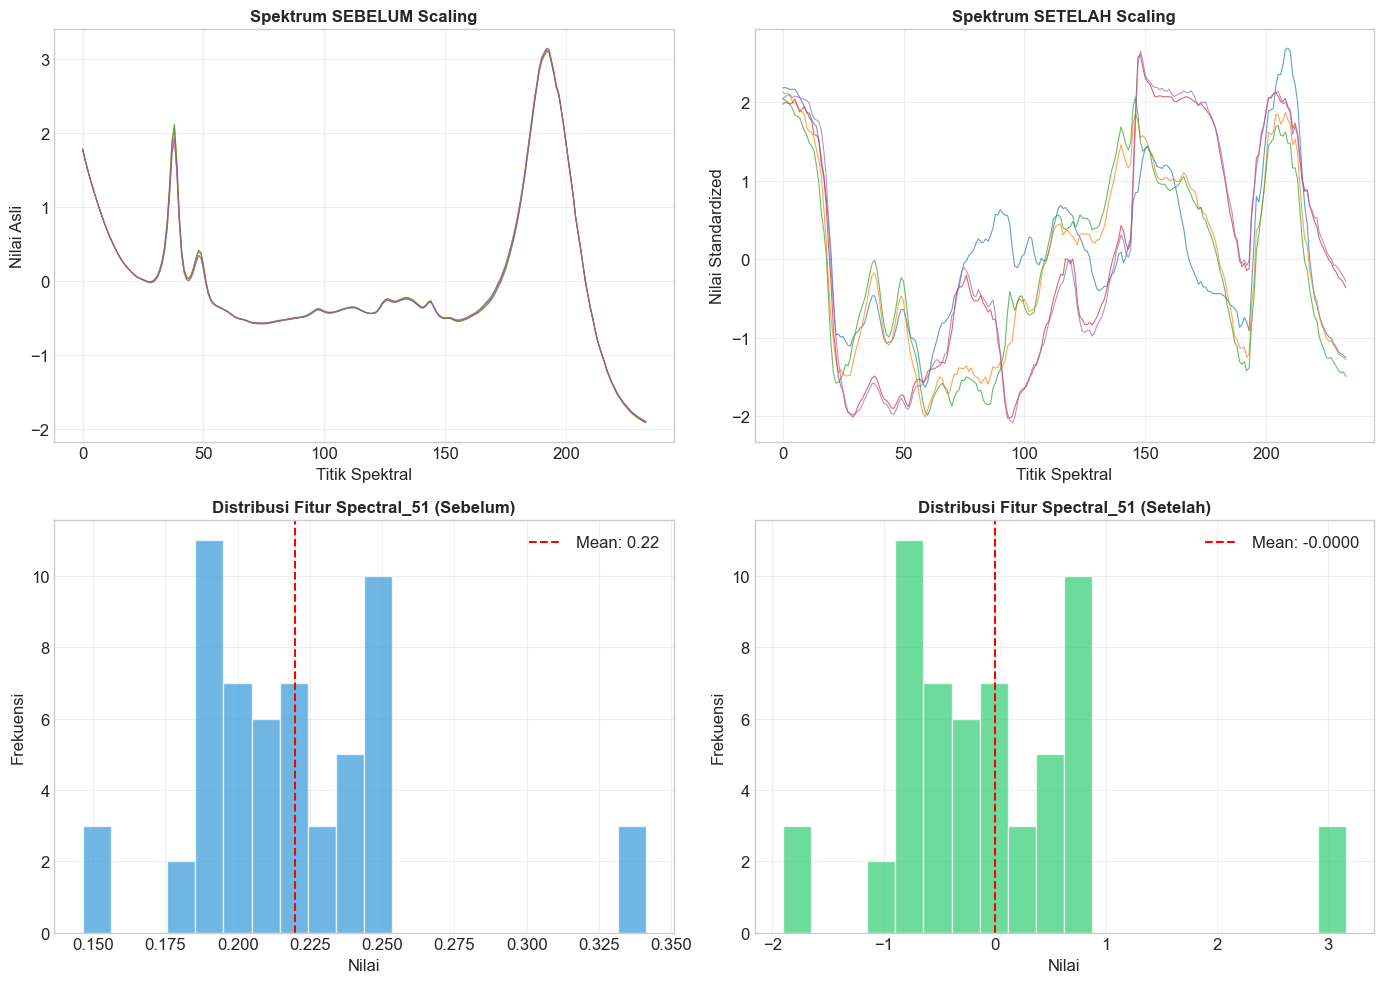

In [17]:
# Visualisasi perbandingan sebelum dan sesudah scaling
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sebelum scaling - Spektrum
ax1 = axes[0, 0]
for i in range(min(5, len(class1_indices))):
    ax1.plot(X_train[class1_indices[i]], alpha=0.7, linewidth=0.8)
ax1.set_title('Spektrum SEBELUM Scaling', fontsize=12, fontweight='bold')
ax1.set_xlabel('Titik Spektral')
ax1.set_ylabel('Nilai Asli')
ax1.grid(True, alpha=0.3)

# Setelah scaling - Spektrum
ax2 = axes[0, 1]
for i in range(min(5, len(class1_indices))):
    ax2.plot(X_train_scaled[class1_indices[i]], alpha=0.7, linewidth=0.8)
ax2.set_title('Spektrum SETELAH Scaling', fontsize=12, fontweight='bold')
ax2.set_xlabel('Titik Spektral')
ax2.set_ylabel('Nilai Standardized')
ax2.grid(True, alpha=0.3)

# Distribusi fitur sebelum scaling
ax3 = axes[1, 0]
ax3.hist(X_train[:, 50], bins=20, alpha=0.7, color='#3498db', edgecolor='white')
ax3.set_title('Distribusi Fitur Spectral_51 (Sebelum)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Nilai')
ax3.set_ylabel('Frekuensi')
ax3.axvline(X_train[:, 50].mean(), color='red', linestyle='--', label=f'Mean: {X_train[:, 50].mean():.2f}')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Distribusi fitur setelah scaling
ax4 = axes[1, 1]
ax4.hist(X_train_scaled[:, 50], bins=20, alpha=0.7, color='#2ecc71', edgecolor='white')
ax4.set_title('Distribusi Fitur Spectral_51 (Setelah)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Nilai')
ax4.set_ylabel('Frekuensi')
ax4.axvline(X_train_scaled[:, 50].mean(), color='red', linestyle='--', label=f'Mean: {X_train_scaled[:, 50].mean():.4f}')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3.3 Dimensionality Reduction dengan PCA

Dataset memiliki 234 fitur dengan korelasi tinggi antar fitur yang berdekatan. PCA akan:
- Mengurangi dimensionalitas data
- Menghilangkan redundansi informasi
- Mempercepat proses training model
- Mengurangi risiko overfitting

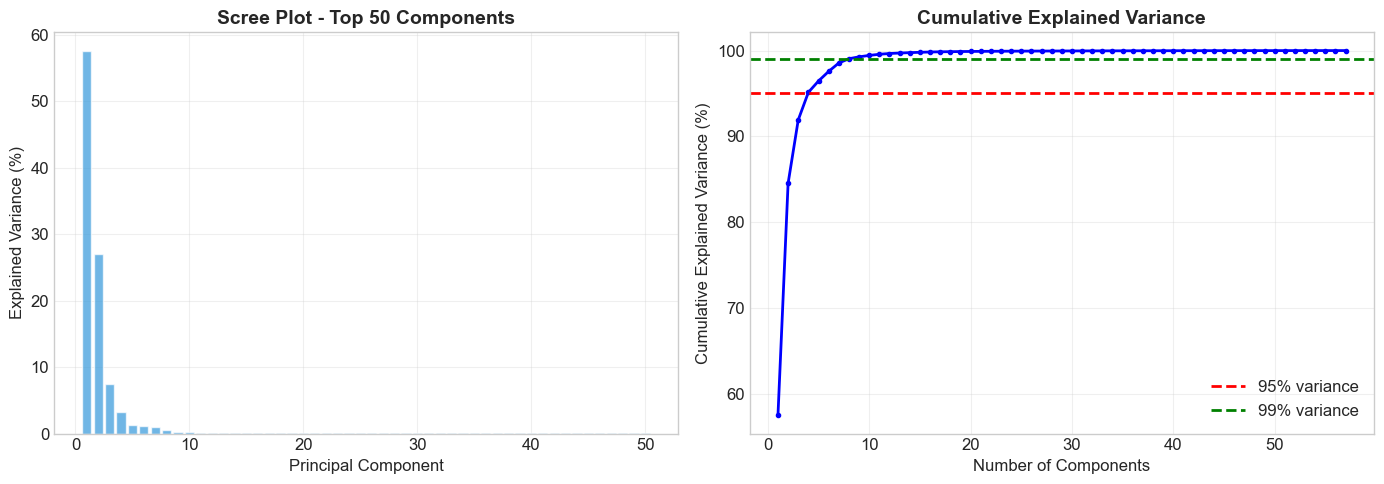


Analisis Komponen PCA:
   Komponen untuk 95% variance: 4
   Komponen untuk 99% variance: 8
   Total komponen asli: 234


In [18]:
# Analisis PCA - Menentukan jumlah komponen optimal
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Hitung cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Visualisasi explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Scree plot
ax1 = axes[0]
ax1.bar(range(1, min(51, len(pca_full.explained_variance_ratio_) + 1)), 
        pca_full.explained_variance_ratio_[:50] * 100, 
        alpha=0.7, color='#3498db', edgecolor='white')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance (%)', fontsize=12)
ax1.set_title('Scree Plot - Top 50 Components', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative explained variance
ax2 = axes[1]
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 
         'b-', linewidth=2, marker='o', markersize=3)
ax2.axhline(y=95, color='r', linestyle='--', linewidth=2, label='95% variance')
ax2.axhline(y=99, color='g', linestyle='--', linewidth=2, label='99% variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance (%)', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tentukan jumlah komponen untuk 95% dan 99% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"\nAnalisis Komponen PCA:")
print(f"   Komponen untuk 95% variance: {n_components_95}")
print(f"   Komponen untuk 99% variance: {n_components_99}")
print(f"   Total komponen asli: {X_train.shape[1]}")

In [19]:
# Terapkan PCA dengan 95% variance
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Hasil PCA (95% Variance):")
print(f"   Dimensi asli: {X_train_scaled.shape[1]} fitur")
print(f"   Dimensi setelah PCA: {X_train_pca.shape[1]} komponen")
print(f"   Reduksi: {((X_train_scaled.shape[1] - X_train_pca.shape[1]) / X_train_scaled.shape[1] * 100):.1f}%")
print(f"   Total variance explained: {sum(pca.explained_variance_ratio_) * 100:.2f}%")

Hasil PCA (95% Variance):
   Dimensi asli: 234 fitur
   Dimensi setelah PCA: 4 komponen
   Reduksi: 98.3%
   Total variance explained: 95.13%


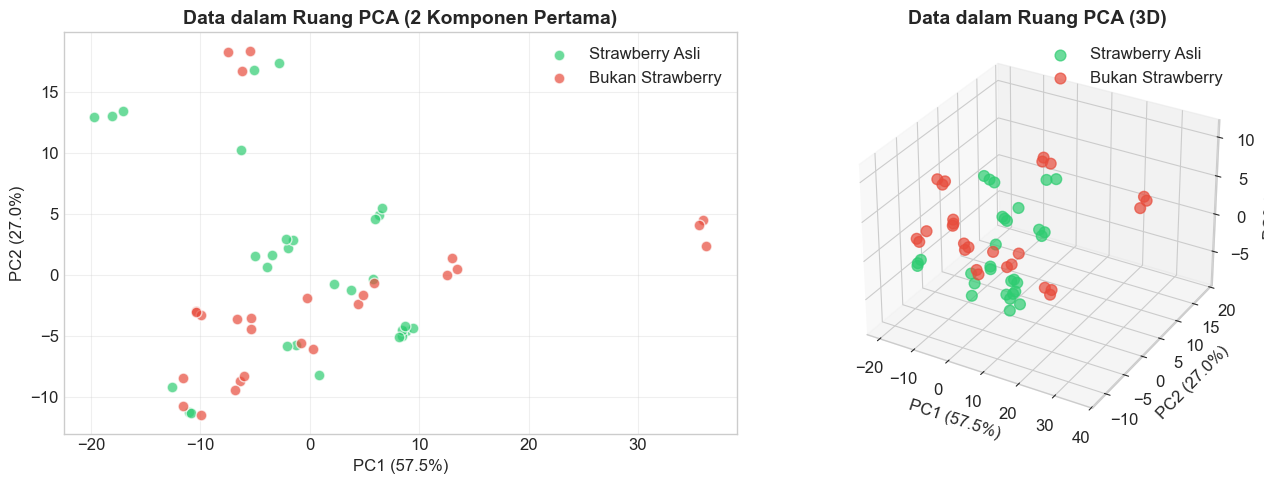

In [20]:
# Visualisasi data dalam ruang PCA (2D)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA 2D visualization
ax1 = axes[0]
colors = ['#2ecc71', '#e74c3c']
for idx, (label, color) in enumerate(zip([1.0, 2.0], colors)):
    mask = y_train == label
    label_name = 'Strawberry Asli' if label == 1.0 else 'Bukan Strawberry'
    ax1.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], 
                c=color, label=label_name, alpha=0.7, edgecolors='white', s=60)
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
ax1.set_title('Data dalam Ruang PCA (2 Komponen Pertama)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# PCA 3D visualization (jika ada cukup komponen)
if X_train_pca.shape[1] >= 3:
    ax2 = fig.add_subplot(122, projection='3d')
    for idx, (label, color) in enumerate(zip([1.0, 2.0], colors)):
        mask = y_train == label
        label_name = 'Strawberry Asli' if label == 1.0 else 'Bukan Strawberry'
        ax2.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], X_train_pca[mask, 2],
                    c=color, label=label_name, alpha=0.7, s=60)
    ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
    ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
    ax2.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)')
    ax2.set_title('Data dalam Ruang PCA (3D)', fontsize=14, fontweight='bold')
    ax2.legend()
    axes[1].set_visible(False)

plt.tight_layout()
plt.show()

## 3.4 Feature Selection (Opsional)

Selain PCA, kita juga dapat menggunakan metode seleksi fitur berdasarkan skor statistik untuk mengidentifikasi fitur yang paling informatif.

Top 20 Fitur Berdasarkan ANOVA F-Score:
     Feature   F_Score  P_Value
 Spectral_23 11.119562 0.001534
 Spectral_22  9.961608 0.002593
 Spectral_24  9.744981 0.002865
 Spectral_25  9.171822 0.003738
 Spectral_26  9.133073 0.003806
Spectral_215  8.908786 0.004228
Spectral_216  8.702084 0.004661
 Spectral_68  8.584829 0.004927
 Spectral_67  8.389094 0.005407
Spectral_212  8.370994 0.005454
Spectral_213  8.054593 0.006345
 Spectral_30  8.036164 0.006402
 Spectral_29  7.789148 0.007212
Spectral_214  7.771514 0.007273
Spectral_217  7.632345 0.007781
 Spectral_27  7.622356 0.007819
 Spectral_66  7.619119 0.007831
 Spectral_21  7.367013 0.008855
 Spectral_31  7.117260 0.010010
 Spectral_28  7.095964 0.010116


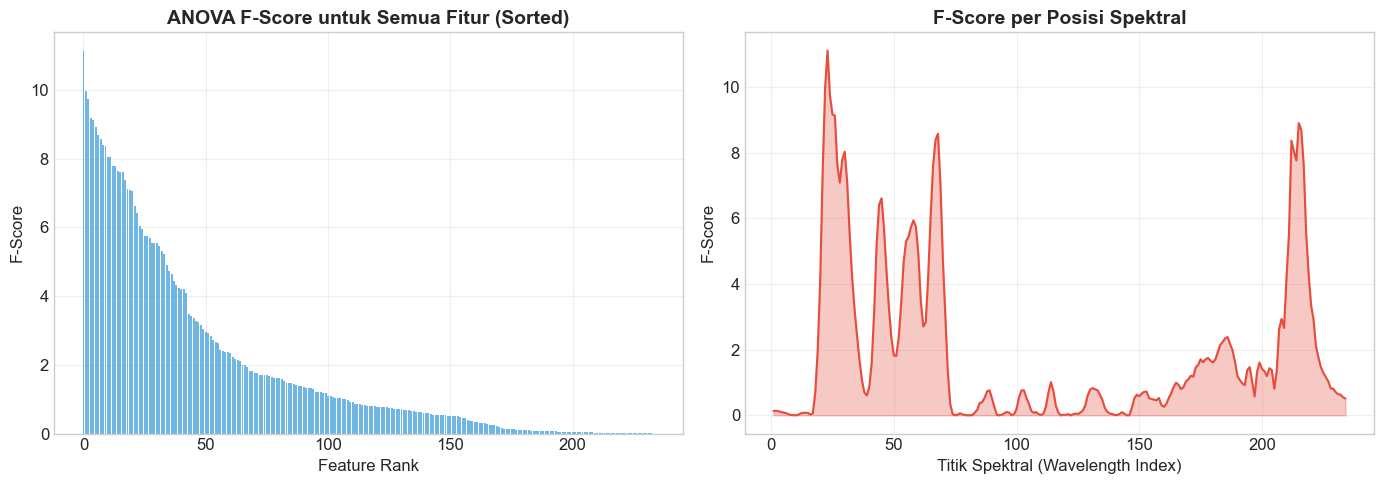


Region spektral paling diskriminatif berada di sekitar indeks: [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 66, 67, 68, 212, 213, 214, 215, 216, 217]


In [21]:
# Feature Selection menggunakan ANOVA F-value
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_scaled, y_train)

# Dapatkan skor untuk setiap fitur
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'F_Score': selector.scores_,
    'P_Value': selector.pvalues_
}).sort_values('F_Score', ascending=False)

print("Top 20 Fitur Berdasarkan ANOVA F-Score:")
print(feature_scores.head(20).to_string(index=False))

# Visualisasi distribusi skor fitur
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot skor fitur (semua)
ax1 = axes[0]
feature_indices = [int(f.split('_')[1]) for f in feature_scores['Feature']]
ax1.bar(range(len(feature_scores)), feature_scores['F_Score'].values, 
        alpha=0.7, color='#3498db', edgecolor='none')
ax1.set_xlabel('Feature Rank', fontsize=12)
ax1.set_ylabel('F-Score', fontsize=12)
ax1.set_title('ANOVA F-Score untuk Semua Fitur (Sorted)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot skor fitur berdasarkan posisi spektral
ax2 = axes[1]
scores_by_position = selector.scores_
ax2.plot(range(1, len(scores_by_position) + 1), scores_by_position, 
         color='#e74c3c', linewidth=1.5)
ax2.fill_between(range(1, len(scores_by_position) + 1), scores_by_position, 
                  alpha=0.3, color='#e74c3c')
ax2.set_xlabel('Titik Spektral (Wavelength Index)', fontsize=12)
ax2.set_ylabel('F-Score', fontsize=12)
ax2.set_title('F-Score per Posisi Spektral', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identifikasi region spektral yang paling diskriminatif
top_features = feature_scores.head(20)['Feature'].tolist()
top_indices = [int(f.split('_')[1]) for f in top_features]
print(f"\nRegion spektral paling diskriminatif berada di sekitar indeks: {sorted(top_indices)}")

## 3.5 Persiapan Data untuk Modeling

Kita akan menyiapkan beberapa versi data untuk eksperimen modeling:

In [22]:
# Siapkan berbagai versi data untuk modeling
datasets = {
    'Original': (X_train, X_test, 'Data tanpa preprocessing'),
    'Scaled': (X_train_scaled, X_test_scaled, 'Data setelah standardization'),
    'PCA': (X_train_pca, X_test_pca, f'Data setelah PCA ({X_train_pca.shape[1]} komponen)')
}

print("="*70)
print("                    RINGKASAN DATA PREPROCESSING")
print("="*70)
print("\nDataset yang tersedia untuk modeling:")
print("-"*70)

for name, (X_tr, X_te, desc) in datasets.items():
    print(f"\n{name}:")
    print(f"   Deskripsi: {desc}")
    print(f"   Shape Training: {X_tr.shape}")
    print(f"   Shape Testing: {X_te.shape}")

print("\n" + "="*70)
print("Label (y_train, y_test) tetap sama untuk semua dataset")
print(f"   y_train: {y_train.shape}, y_test: {y_test.shape}")
print("="*70)

                    RINGKASAN DATA PREPROCESSING

Dataset yang tersedia untuk modeling:
----------------------------------------------------------------------

Original:
   Deskripsi: Data tanpa preprocessing
   Shape Training: (57, 234)
   Shape Testing: (54, 234)

Scaled:
   Deskripsi: Data setelah standardization
   Shape Training: (57, 234)
   Shape Testing: (54, 234)

PCA:
   Deskripsi: Data setelah PCA (4 komponen)
   Shape Training: (57, 4)
   Shape Testing: (54, 4)

Label (y_train, y_test) tetap sama untuk semua dataset
   y_train: (57,), y_test: (54,)


## 3.6 Ringkasan Data Preprocessing

| Tahap | Metode | Hasil |
|-------|--------|-------|
| **Scaling** | StandardScaler | Mean ≈ 0, Std ≈ 1 |
| **Dimensionality Reduction** | PCA (95% variance) | Reduksi fitur signifikan |
| **Feature Analysis** | ANOVA F-Score | Identifikasi fitur diskriminatif |

---
# 4. Modeling

Pada tahap ini kita akan membangun dan membandingkan beberapa model klasifikasi:
1. **K-Nearest Neighbors (KNN)**
2. **Support Vector Machine (SVM)**
3. **Random Forest**
4. **Logistic Regression**
5. **Gradient Boosting**

## 4.1 Import Library untuk Modeling

In [23]:
# Import library untuk modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix,
                             roc_curve, auc, roc_auc_score)
import joblib
import time

print("Library modeling berhasil diimport!")

Library modeling berhasil diimport!


## 4.2 Definisi Model dan Hyperparameter

In [24]:
# Definisi model dan parameter untuk tuning
models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5]
        }
    }
}

print(f"Total {len(models)} model akan dilatih dan di-tune")

Total 5 model akan dilatih dan di-tune


## 4.3 Training dengan GridSearchCV

In [25]:
# Training semua model dengan GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

print("="*70)
print("                    TRAINING MODEL")
print("="*70)

for name, config in models.items():
    print(f"\n[Training] {name}...")
    start_time = time.time()
    
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    elapsed_time = time.time() - start_time
    
    results[name] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
        'training_time': elapsed_time
    }
    
    print(f"   Best CV Score: {grid_search.best_score_:.4f}")
    print(f"   Best Params: {grid_search.best_params_}")
    print(f"   Training Time: {elapsed_time:.2f}s")

print("\n" + "="*70)
print("Training selesai!")
print("="*70)

                    TRAINING MODEL

[Training] KNN...
   Best CV Score: 0.8470
   Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
   Training Time: 6.56s

[Training] SVM...
   Best CV Score: 0.9818
   Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
   Training Time: 0.16s

[Training] Random Forest...
   Best CV Score: 0.8424
   Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
   Training Time: 3.69s

[Training] Logistic Regression...
   Best CV Score: 0.9652
   Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
   Training Time: 0.12s

[Training] Gradient Boosting...
   Best CV Score: 0.9485
   Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
   Training Time: 2.70s

Training selesai!


## 4.4 Perbandingan Cross-Validation Score

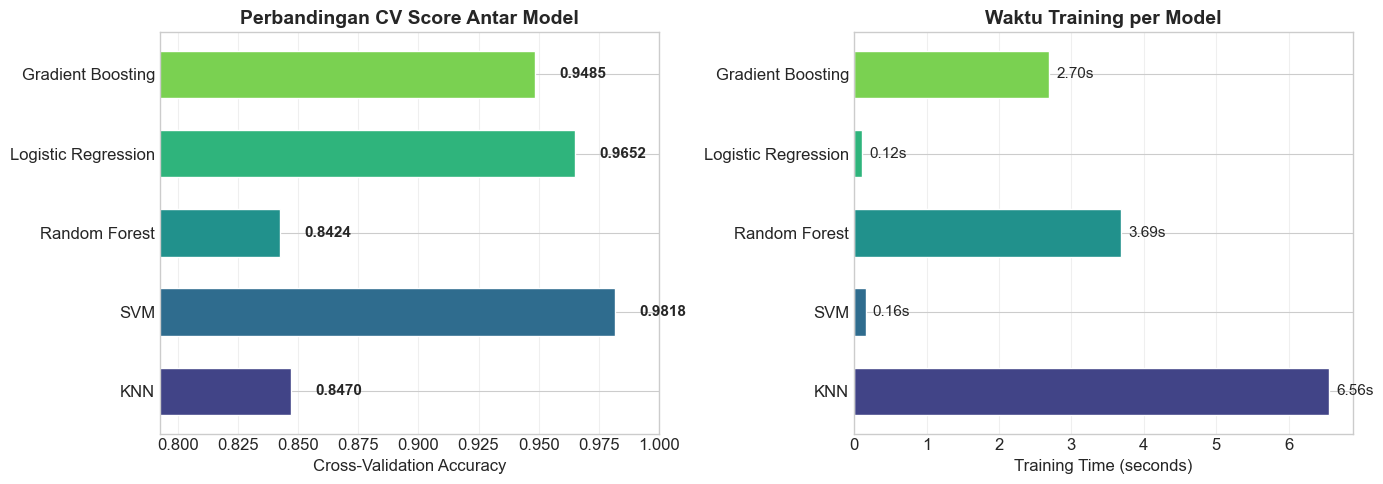


Ringkasan Hasil Training:
----------------------------------------------------------------------
              Model CV Score Training Time
                KNN   0.8470         6.56s
                SVM   0.9818         0.16s
      Random Forest   0.8424         3.69s
Logistic Regression   0.9652         0.12s
  Gradient Boosting   0.9485         2.70s


In [26]:
# Visualisasi perbandingan CV score
model_names = list(results.keys())
cv_scores = [results[name]['best_cv_score'] for name in model_names]
training_times = [results[name]['training_time'] for name in model_names]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot CV Score
ax1 = axes[0]
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(model_names)))
bars = ax1.barh(model_names, cv_scores, color=colors, edgecolor='white', height=0.6)
ax1.set_xlabel('Cross-Validation Accuracy', fontsize=12)
ax1.set_title('Perbandingan CV Score Antar Model', fontsize=14, fontweight='bold')
ax1.set_xlim([min(cv_scores) - 0.05, 1.0])
for bar, score in zip(bars, cv_scores):
    ax1.text(score + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{score:.4f}', va='center', fontsize=11, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Plot Training Time
ax2 = axes[1]
bars2 = ax2.barh(model_names, training_times, color=colors, edgecolor='white', height=0.6)
ax2.set_xlabel('Training Time (seconds)', fontsize=12)
ax2.set_title('Waktu Training per Model', fontsize=14, fontweight='bold')
for bar, t in zip(bars2, training_times):
    ax2.text(t + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{t:.2f}s', va='center', fontsize=11)
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Tabel ringkasan
print("\nRingkasan Hasil Training:")
print("-"*70)
summary_df = pd.DataFrame({
    'Model': model_names,
    'CV Score': [f"{s:.4f}" for s in cv_scores],
    'Training Time': [f"{t:.2f}s" for t in training_times]
})
print(summary_df.to_string(index=False))

---
# 5. Evaluation

Evaluasi model menggunakan data testing yang belum pernah dilihat selama training.

## 5.1 Evaluasi pada Data Testing

In [27]:
# Evaluasi semua model pada data testing
test_results = {}

print("="*70)
print("                    EVALUASI PADA DATA TESTING")
print("="*70)

for name, data in results.items():
    model = data['best_model']
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    test_results[name] = {
        'y_pred': y_pred,
        'y_proba': y_proba,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, pos_label=1.0),
        'recall': recall_score(y_test, y_pred, pos_label=1.0),
        'f1': f1_score(y_test, y_pred, pos_label=1.0),
        'roc_auc': roc_auc_score(y_test, y_proba)
    }

# Tampilkan hasil
eval_df = pd.DataFrame({
    'Model': list(test_results.keys()),
    'Accuracy': [test_results[m]['accuracy'] for m in test_results],
    'Precision': [test_results[m]['precision'] for m in test_results],
    'Recall': [test_results[m]['recall'] for m in test_results],
    'F1-Score': [test_results[m]['f1'] for m in test_results],
    'ROC-AUC': [test_results[m]['roc_auc'] for m in test_results]
})

eval_df = eval_df.sort_values('Accuracy', ascending=False)
print("\nHasil Evaluasi (Sorted by Accuracy):")
print("-"*70)
print(eval_df.round(4).to_string(index=False))

                    EVALUASI PADA DATA TESTING

Hasil Evaluasi (Sorted by Accuracy):
----------------------------------------------------------------------
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
                SVM    0.8889     0.8621  0.9259    0.8929   0.9616
Logistic Regression    0.8704     0.8571  0.8889    0.8727   0.9794
      Random Forest    0.7222     0.6875  0.8148    0.7458   0.8484
  Gradient Boosting    0.5370     0.5294  0.6667    0.5902   0.5569
                KNN    0.5185     0.5217  0.4444    0.4800   0.6029


## 5.2 Visualisasi Performa Model

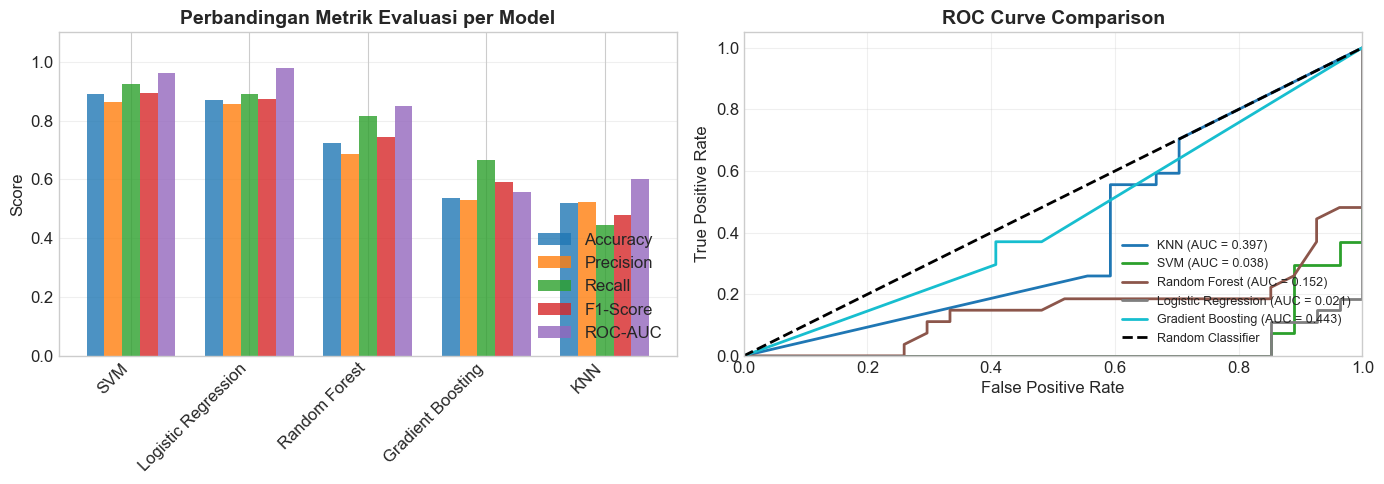

In [28]:
# Visualisasi perbandingan metrik
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grouped bar chart untuk semua metrik
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(eval_df))
width = 0.15

ax1 = axes[0]
for i, metric in enumerate(metrics):
    offset = (i - 2) * width
    bars = ax1.bar(x + offset, eval_df[metric], width, label=metric, alpha=0.8)

ax1.set_ylabel('Score', fontsize=12)
ax1.set_title('Perbandingan Metrik Evaluasi per Model', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(eval_df['Model'], rotation=45, ha='right')
ax1.legend(loc='lower right')
ax1.set_ylim([0, 1.1])
ax1.grid(True, alpha=0.3, axis='y')

# ROC Curve untuk semua model
ax2 = axes[1]
colors = plt.cm.tab10(np.linspace(0, 1, len(test_results)))

for (name, data), color in zip(test_results.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, data['y_proba'], pos_label=1.0)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

ax2.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve Comparison', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5.3 Confusion Matrix

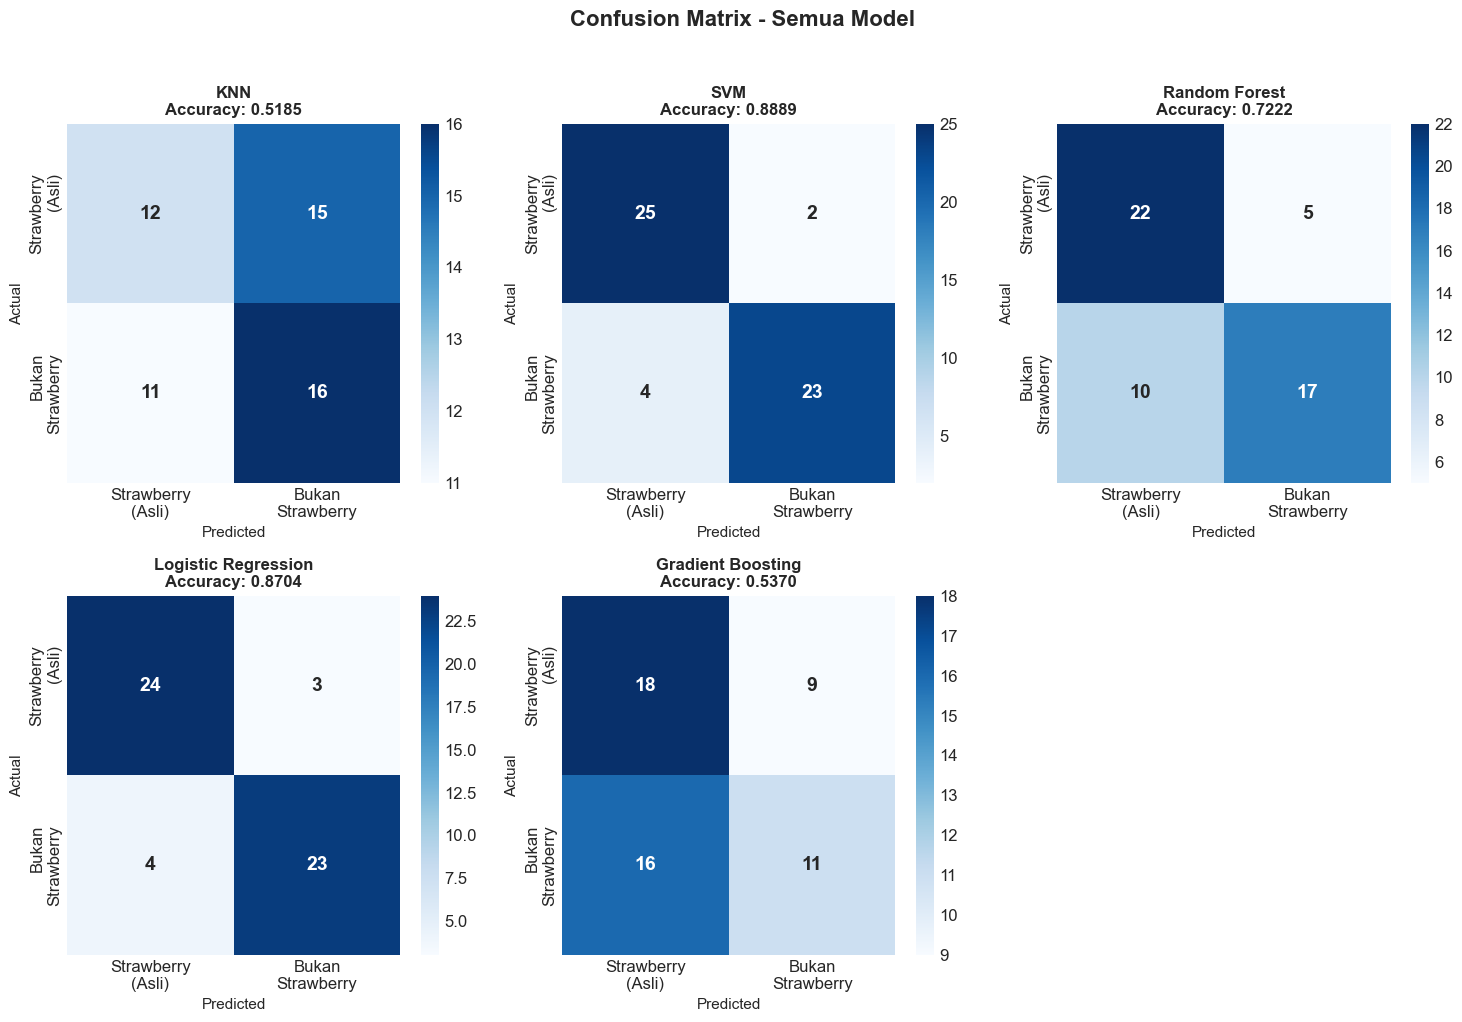

In [29]:
# Confusion matrix untuk semua model
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

class_labels = ['Strawberry\n(Asli)', 'Bukan\nStrawberry']

for idx, (name, data) in enumerate(test_results.items()):
    ax = axes[idx]
    cm = confusion_matrix(y_test, data['y_pred'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels,
                annot_kws={'size': 14, 'weight': 'bold'})
    ax.set_title(f'{name}\nAccuracy: {data["accuracy"]:.4f}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Actual', fontsize=11)
    ax.set_xlabel('Predicted', fontsize=11)

# Hapus axes yang tidak terpakai
if len(test_results) < 6:
    axes[-1].set_visible(False)

plt.suptitle('Confusion Matrix - Semua Model', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 5.4 Pemilihan Model Terbaik

In [30]:
# Pilih model terbaik berdasarkan accuracy
best_model_name = max(test_results, key=lambda x: test_results[x]['accuracy'])
best_model = results[best_model_name]['best_model']
best_accuracy = test_results[best_model_name]['accuracy']

print("="*70)
print("                    MODEL TERBAIK")
print("="*70)
print(f"\nModel: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Parameters: {results[best_model_name]['best_params']}")
print(f"\nClassification Report:")
print("-"*70)
print(classification_report(y_test, test_results[best_model_name]['y_pred'],
                            target_names=['Strawberry (Asli)', 'Bukan Strawberry']))

                    MODEL TERBAIK

Model: SVM
Accuracy: 0.8889
Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report:
----------------------------------------------------------------------
                   precision    recall  f1-score   support

Strawberry (Asli)       0.86      0.93      0.89        27
 Bukan Strawberry       0.92      0.85      0.88        27

         accuracy                           0.89        54
        macro avg       0.89      0.89      0.89        54
     weighted avg       0.89      0.89      0.89        54



## 5.5 Simpan Model Terbaik

In [31]:
# Simpan model terbaik dan scaler untuk deployment
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model dan scaler berhasil disimpan:")
print("   - best_model.pkl")
print("   - scaler.pkl")

Model dan scaler berhasil disimpan:
   - best_model.pkl
   - scaler.pkl


---
# 6. Deployment

Implementasi model menggunakan Streamlit untuk membuat aplikasi web interaktif.

## 6.1 Membuat Aplikasi Streamlit

Jalankan cell di bawah ini untuk membuat file `app.py` yang berisi aplikasi Streamlit.

In [32]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import joblib
import plotly.express as px
import plotly.graph_objects as go

# Page configuration
st.set_page_config(
    page_title="Wine Classification - FTIR Spectroscopy",
    page_icon="🍷",
    layout="wide"
)

# Load model dan scaler
@st.cache_resource
def load_model():
    model = joblib.load('best_model.pkl')
    scaler = joblib.load('scaler.pkl')
    return model, scaler

model, scaler = load_model()

# Title
st.title("🍷 Wine Classification System")
st.markdown("### Klasifikasi Strawberry menggunakan FTIR Spectroscopy")
st.markdown("---")

# Sidebar
st.sidebar.header("📊 Tentang Aplikasi")
st.sidebar.info("""
Aplikasi ini mengklasifikasikan sampel berdasarkan data spektral FTIR:
- **Kelas 1**: Strawberry Asli
- **Kelas 2**: Bukan Strawberry (Palsu/Lainnya)
""")

# Main content
tab1, tab2, tab3 = st.tabs(["🔮 Prediksi", "📈 Visualisasi Data", "ℹ️ Info Model"])

with tab1:
    st.header("Input Data Spektral")
    
    input_method = st.radio("Pilih metode input:", 
                            ["Upload File", "Input Manual", "Gunakan Sample Data"])
    
    if input_method == "Upload File":
        uploaded_file = st.file_uploader("Upload file spektral (.txt atau .csv)", 
                                         type=['txt', 'csv'])
        if uploaded_file is not None:
            try:
                if uploaded_file.name.endswith('.csv'):
                    data = pd.read_csv(uploaded_file, header=None)
                else:
                    data = pd.read_csv(uploaded_file, sep='\s+', header=None)
                
                # Ambil fitur (asumsikan kolom pertama adalah label jika ada 235 kolom)
                if data.shape[1] == 235:
                    X_input = data.iloc[:, 1:].values
                    st.info(f"Terdeteksi {len(X_input)} sampel dengan label")
                else:
                    X_input = data.values
                    st.info(f"Terdeteksi {len(X_input)} sampel")
                
                if st.button("🔍 Prediksi", key="predict_file"):
                    X_scaled = scaler.transform(X_input)
                    predictions = model.predict(X_scaled)
                    probabilities = model.predict_proba(X_scaled)
                    
                    results_df = pd.DataFrame({
                        'Sample': range(1, len(predictions) + 1),
                        'Prediksi': ['Strawberry Asli' if p == 1 else 'Bukan Strawberry' for p in predictions],
                        'Confidence': [max(prob) * 100 for prob in probabilities]
                    })
                    
                    st.success("Prediksi berhasil!")
                    st.dataframe(results_df, use_container_width=True)
                    
            except Exception as e:
                st.error(f"Error membaca file: {e}")
    
    elif input_method == "Input Manual":
        st.markdown("Masukkan 234 nilai spektral (dipisahkan koma atau spasi):")
        input_text = st.text_area("Nilai spektral:", height=150)
        
        if st.button("🔍 Prediksi", key="predict_manual"):
            if input_text:
                try:
                    values = input_text.replace(',', ' ').split()
                    X_input = np.array([float(v) for v in values]).reshape(1, -1)
                    
                    if X_input.shape[1] == 234:
                        X_scaled = scaler.transform(X_input)
                        prediction = model.predict(X_scaled)[0]
                        probability = model.predict_proba(X_scaled)[0]
                        
                        col1, col2 = st.columns(2)
                        with col1:
                            if prediction == 1:
                                st.success("### ✅ Strawberry Asli")
                            else:
                                st.error("### ❌ Bukan Strawberry")
                        
                        with col2:
                            st.metric("Confidence", f"{max(probability)*100:.2f}%")
                        
                        # Plot spektrum
                        fig = px.line(x=range(1, 235), y=X_input.flatten(),
                                     labels={'x': 'Wavelength Index', 'y': 'Absorbance'},
                                     title='Spektrum Input')
                        st.plotly_chart(fig, use_container_width=True)
                    else:
                        st.error(f"Jumlah fitur harus 234, ditemukan {X_input.shape[1]}")
                except Exception as e:
                    st.error(f"Error: {e}")
    
    else:  # Sample Data
        st.markdown("Menggunakan sample data dari dataset testing")
        
        # Load sample data
        test_data = np.loadtxt('Wine_TEST.txt')
        X_sample = test_data[:, 1:]
        y_sample = test_data[:, 0]
        
        sample_idx = st.slider("Pilih sample index:", 0, len(X_sample)-1, 0)
        
        if st.button("🔍 Prediksi Sample", key="predict_sample"):
            X_input = X_sample[sample_idx:sample_idx+1]
            X_scaled = scaler.transform(X_input)
            prediction = model.predict(X_scaled)[0]
            probability = model.predict_proba(X_scaled)[0]
            
            col1, col2, col3 = st.columns(3)
            with col1:
                actual_label = "Strawberry Asli" if y_sample[sample_idx] == 1 else "Bukan Strawberry"
                st.info(f"**Label Asli:** {actual_label}")
            with col2:
                pred_label = "Strawberry Asli" if prediction == 1 else "Bukan Strawberry"
                if prediction == y_sample[sample_idx]:
                    st.success(f"**Prediksi:** {pred_label} ✅")
                else:
                    st.error(f"**Prediksi:** {pred_label} ❌")
            with col3:
                st.metric("Confidence", f"{max(probability)*100:.2f}%")
            
            # Plot spektrum
            fig = px.line(x=range(1, 235), y=X_input.flatten(),
                         labels={'x': 'Wavelength Index', 'y': 'Absorbance'},
                         title=f'Spektrum Sample #{sample_idx}')
            st.plotly_chart(fig, use_container_width=True)

with tab2:
    st.header("Visualisasi Dataset")
    
    # Load data
    train_data = np.loadtxt('Wine_TRAIN.txt')
    test_data = np.loadtxt('Wine_TEST.txt')
    
    X_train = train_data[:, 1:]
    y_train = train_data[:, 0]
    X_test = test_data[:, 1:]
    y_test = test_data[:, 0]
    
    viz_option = st.selectbox("Pilih visualisasi:", 
                              ["Distribusi Kelas", "Rata-rata Spektrum per Kelas", 
                               "Perbandingan Spektrum"])
    
    if viz_option == "Distribusi Kelas":
        fig = go.Figure()
        
        train_counts = [np.sum(y_train == 1), np.sum(y_train == 2)]
        test_counts = [np.sum(y_test == 1), np.sum(y_test == 2)]
        
        fig.add_trace(go.Bar(name='Training', x=['Strawberry Asli', 'Bukan Strawberry'], 
                            y=train_counts, marker_color='#2ecc71'))
        fig.add_trace(go.Bar(name='Testing', x=['Strawberry Asli', 'Bukan Strawberry'], 
                            y=test_counts, marker_color='#3498db'))
        
        fig.update_layout(title='Distribusi Kelas', barmode='group',
                         xaxis_title='Kelas', yaxis_title='Jumlah Sampel')
        st.plotly_chart(fig, use_container_width=True)
    
    elif viz_option == "Rata-rata Spektrum per Kelas":
        mean_class1 = X_train[y_train == 1].mean(axis=0)
        mean_class2 = X_train[y_train == 2].mean(axis=0)
        
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=list(range(1, 235)), y=mean_class1, 
                                name='Strawberry Asli', line=dict(color='#2ecc71')))
        fig.add_trace(go.Scatter(x=list(range(1, 235)), y=mean_class2, 
                                name='Bukan Strawberry', line=dict(color='#e74c3c')))
        
        fig.update_layout(title='Rata-rata Spektrum per Kelas',
                         xaxis_title='Wavelength Index', yaxis_title='Absorbance')
        st.plotly_chart(fig, use_container_width=True)
    
    else:  # Perbandingan Spektrum
        n_samples = st.slider("Jumlah sampel per kelas:", 1, 10, 3)
        
        fig = go.Figure()
        
        class1_idx = np.where(y_train == 1)[0][:n_samples]
        class2_idx = np.where(y_train == 2)[0][:n_samples]
        
        for i, idx in enumerate(class1_idx):
            fig.add_trace(go.Scatter(x=list(range(1, 235)), y=X_train[idx],
                                    name=f'Strawberry #{i+1}', 
                                    line=dict(color='#2ecc71'), opacity=0.7))
        
        for i, idx in enumerate(class2_idx):
            fig.add_trace(go.Scatter(x=list(range(1, 235)), y=X_train[idx],
                                    name=f'Non-Strawberry #{i+1}', 
                                    line=dict(color='#e74c3c'), opacity=0.7))
        
        fig.update_layout(title='Perbandingan Spektrum Antar Kelas',
                         xaxis_title='Wavelength Index', yaxis_title='Absorbance')
        st.plotly_chart(fig, use_container_width=True)

with tab3:
    st.header("Informasi Model")
    
    col1, col2 = st.columns(2)
    
    with col1:
        st.subheader("Detail Model")
        st.write(f"**Tipe Model:** {type(model).__name__}")
        st.write(f"**Jumlah Fitur:** 234")
        st.write(f"**Jumlah Kelas:** 2")
        
        st.subheader("Kelas Target")
        st.markdown("""
        | Kelas | Label | Deskripsi |
        |-------|-------|-----------|
        | 1 | Strawberry Asli | Sampel strawberry murni |
        | 2 | Bukan Strawberry | Sampel palsu/buah lain |
        """)
    
    with col2:
        st.subheader("Metodologi")
        st.markdown("""
        **CRISP-DM Framework:**
        1. Business Understanding
        2. Data Understanding
        3. Data Preprocessing
        4. Modeling
        5. Evaluation
        6. Deployment
        
        **Teknik Pengumpulan Data:**
        - FTIR Spectroscopy
        - ATR Sampling
        """)
    
    st.subheader("Cara Penggunaan")
    st.markdown("""
    1. Pilih tab **Prediksi** untuk melakukan klasifikasi
    2. Pilih metode input (upload file, manual, atau sample data)
    3. Klik tombol **Prediksi** untuk melihat hasil
    4. Tab **Visualisasi Data** menampilkan eksplorasi dataset
    """)

Writing app.py


## 6.2 Requirements

In [33]:
%%writefile requirements.txt
streamlit>=1.28.0
numpy>=1.24.0
pandas>=2.0.0
scikit-learn>=1.3.0
plotly>=5.18.0
joblib>=1.3.0

Writing requirements.txt


## 6.3 Menjalankan Aplikasi

In [34]:
# Install dependencies (jalankan sekali)
# !pip install streamlit plotly

# Untuk menjalankan aplikasi, buka terminal dan jalankan:
# streamlit run app.py

print("File yang dibuat untuk deployment:")
print("   1. app.py - Aplikasi Streamlit")
print("   2. requirements.txt - Dependencies")
print("   3. best_model.pkl - Model terlatih")
print("   4. scaler.pkl - Scaler untuk preprocessing")
print("\nJalankan aplikasi dengan perintah:")
print("   streamlit run app.py")

File yang dibuat untuk deployment:
   1. app.py - Aplikasi Streamlit
   2. requirements.txt - Dependencies
   3. best_model.pkl - Model terlatih
   4. scaler.pkl - Scaler untuk preprocessing

Jalankan aplikasi dengan perintah:
   streamlit run app.py


## 6.4 Ringkasan Proyek

| Tahap | Deskripsi | Status |
|-------|-----------|--------|
| Business Understanding | Memahami tujuan klasifikasi strawberry | ✅ |
| Data Understanding | EDA dan eksplorasi 234 fitur spektral | ✅ |
| Data Preprocessing | Standardization dan PCA | ✅ |
| Modeling | Training 5 model dengan GridSearchCV | ✅ |
| Evaluation | Evaluasi accuracy, precision, recall, F1, ROC-AUC | ✅ |
| Deployment | Aplikasi Streamlit | ✅ |